# Compiling Site Data
We can compile downcore parameters or comparison plots. Both might be useful.

In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # for sed rate plot
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data (loads all sheets and creates a dictionary of dataframes)
# looking at interpolated data here, but raw data is also available
# and would be useful if you want to do a downcore compilation plot
comps = pd.read_excel("data/comp_inter.xlsx", sheet_name=None)

In [20]:
# create a dictionary to match a unique color and unique marker to each sheet
# 20 sheets at the moment (most recently-added data is Towuti, last sheet in file is M0063 sarah data)
# ['HLY05-01 JPC-TC5', 'IODP 178-1096', 'SPR0901-04BC', 'IODP 349-1431', 'IODP 334-1378', 'IODP 334-1379', 'ODP 180-1109', 'ODP 180-1115', 'ODP 180-1118', 'NBP1203 JKC36', 'IODP 303-U1302-3', 'IODP 303-U1304', 'IODP 303-U1308', 'IODP 342-U1406', 'ODP 175-1075', 'IODP 347-M0063', 'IDLE TOW10-9B', 'NBP10-01 JPC-126', 'NBP10-01 JKC-55, JPC-127', 'IODP 347-M0063_Slotznick']
# sorted by size of dataset descending: ['IODP 178-1096', 'NBP10-01 JPC-126', 'NBP10-01 JKC-55, JPC-127', 'HLY05-01 JPC-TC5', 'NBP1203 JKC36', 'IODP 349-1431', 'ODP 180-1109', 'ODP 180-1118', 'ODP 180-1115', 'SPR0901-04BC', 'IODP 334-1378', 'IODP 347-M0063', 'IODP 334-1379', 'IODP 303-U1302-3', 'IODP 303-U1304', 'IODP 303-U1308', 'IODP 342-U1406', 'IDLE TOW10-9B', 'ODP 175-1075', 'IODP 347-M0063_Slotznick']

sorted_keys = list(comps.keys())
sorted_keys.sort() # plotting in alphabetical order so it's not just random
#print(sorted_keys)
# sort instead by number of magnetite points
size_sort = list(comps.keys())
def sort_func(item):
    return comps[item]["Magnetite [ppm]"].dropna().size
size_sort.sort(reverse=True, key=sort_func)
#print(size_sort)

colors = ["r", "b", "g", "c", "m", "y", "mediumorchid", "orange", "royalblue", "darkviolet", "grey", "chartreuse", "darkcyan", "coral", "maroon", "yellowgreen", "springgreen", "orangered", "k", "slateblue"]
#markers = [".",".",".",".",".",".",".",".",".",".",".",".",".",".",".",".",".",".",".","."]
markers = [".", "v", "^", "<", ">", "8", "X", "p", "*", "h", "+", "H", "1", "2", "3", "4", "P", "D", "d", "x"]
color_dict = dict(zip(size_sort, colors))
marker_dict = dict(zip(size_sort, markers))

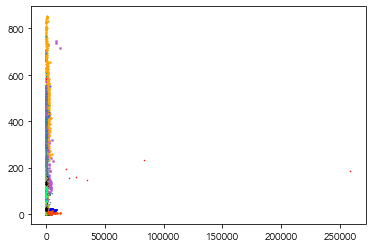

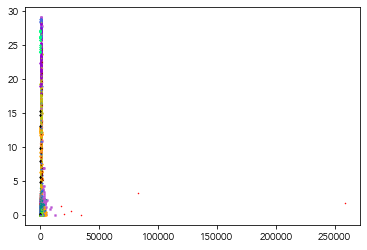

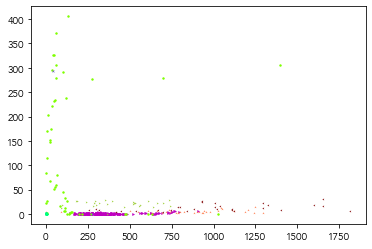

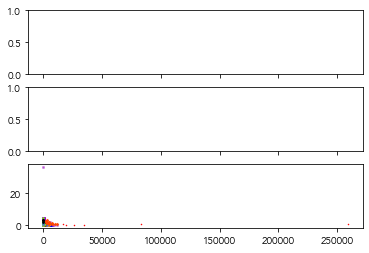

In [158]:
depth_fig, depth_ax = plt.subplots()
# toc_fig, toc_ax = plt.subplots()
sulf_fig, sulf_ax = plt.subplots()
iron_fig, iron_ax = plt.subplots()

combined_fig, axs = plt.subplots(3,1,sharex="all")
#sulf_ax = axs[0]
toc_ax = axs[2]

# go through each sheet, plot all variables in the sheet
# choose what list to iterate over depending on what plotting order you want
for c_key in size_sort:
    # depth can be mbsf or mcd or ambsf
    if "Depth [mbsf]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [mbsf]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Depth [mcd]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [mcd]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Depth [ambsf]" in comps[c_key].columns:
        depth_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Depth [ambsf]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "TOC [wt. %]" in comps[c_key].columns:
        toc_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["TOC [wt. %]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

    if "Sulfate [mM]" in comps[c_key].columns:
        # uncomment one of the lines below to plot either colorbar (lower) or normal (upper)
        sulf_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Sulfate [mM]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)
        #sulf_im = sulf_ax.scatter(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Sulfate [mM]"], c=comps[c_key]["TOC [wt. %]"], vmin=0, vmax=2, marker=marker_dict[c_key], s=2, label=c_key, linestyle="None", linewidths=0.5, edgecolors="none", cmap="cividis")

    if "Fe 2+ [uM]" in comps[c_key].columns:
        iron_ax.plot(comps[c_key]["Magnetite [ppm]"], comps[c_key]["Fe 2+ [uM]"], color=color_dict[c_key], marker=marker_dict[c_key], markersize=2, label=c_key, linestyle="None", mew=0.5)

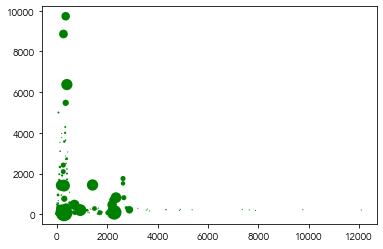

In [135]:
# plot sed rates (slightly different process)
sed_fig, sed_ax = plt.subplots()
#sed_ax = axs[1]
tot = 0 # track total number of data points for later
scale = 5 # to change how big points are in output
for skey in comps:
    # only plot sed rates if data exists
    if "Sedimentation Rate [m/Ma]" in comps[skey].columns:
        # use groupby as in data_fns.py, but aggregate magnetite and depth columns
        # since we will want the average depth of each group for the color
        dropped = comps[skey].dropna(subset=["Magnetite [ppm]"])
        grouped = dropped.groupby("Sedimentation Rate [m/Ma]")
        # count how many points there are from this site
        tot += comps[skey][["Magnetite [ppm]", "Sedimentation Rate [m/Ma]"]].dropna()["Magnetite [ppm]"].size

        # check depth units (mbsf, mcd, or ambsf)
        if "Depth [mbsf]" in comps[skey].columns:
            avgd = grouped[["Depth [mbsf]", "Magnetite [ppm]"]].agg([np.mean, np.std, np.size]).reset_index()
            # plot
            scolors = avgd["Depth [mbsf]"]["mean"]  # avg depth of each group
            # to have colorbar, pass c=scolors to scatter function below
            # note that we plot "scale" times as large as usual for visibility
            im = sed_ax.scatter(avgd["Magnetite [ppm]"]["mean"], avgd["Sedimentation Rate [m/Ma]"], c="g", vmin=0, vmax=900, marker=".", s=avgd["Magnetite [ppm]"]["size"]*scale, label=skey, linestyle="None", linewidths=0.5, edgecolors="none")

        # mcd
        if "Depth [mcd]" in comps[skey].columns:
            avgd = grouped[["Depth [mcd]", "Magnetite [ppm]"]].agg([np.mean, np.std, np.size]).reset_index()
            # plot
            scolors = avgd["Depth [mcd]"]["mean"]  # avg depth of each group
            im = sed_ax.scatter(avgd["Magnetite [ppm]"]["mean"], avgd["Sedimentation Rate [m/Ma]"], c="g", vmin=0, vmax=900, marker=".", s=avgd["Magnetite [ppm]"]["size"]*scale, label=skey, linestyle="None", linewidths=0.5, edgecolors="none")

        # ambsf
        if "Depth [ambsf]" in comps[skey].columns:
            avgd = grouped[["Depth [ambsf]", "Magnetite [ppm]"]].agg([np.mean, np.std, np.size]).reset_index()
            # plot
            scolors = avgd["Depth [ambsf]"]["mean"]  # avg depth of each group
            im = sed_ax.scatter(avgd["Magnetite [ppm]"]["mean"], avgd["Sedimentation Rate [m/Ma]"], c="g", vmin=0, vmax=900, marker=".", s=avgd["Magnetite [ppm]"]["size"]*scale, label=skey, linestyle="None", linewidths=0.5, edgecolors="none")

In [ ]:
# function to calculate and return number of points plotted on graph
def num_points(axes):
    # data is stored as a list of lines, one per site
    lines = axes.get_lines()
    total = 0
    for line in lines:
        # at each site, number of points in line = amount of data
        total += pd.Series(line.get_xdata()).dropna().size
    return total

In [ ]:
# get and plot the legend
# but sort by alphabetical order
handles, labels = depth_ax.get_legend_handles_labels()
# dictionary to map label to its handle
handle_dict = dict(zip(handles, labels))
labels.sort()

def handle_sort(handle):
    return handle_dict[handle]
handles.sort(key=handle_sort)

lfig, lax = plt.subplots()
lax.axis(False)
lax.legend(handles=handles, labels=labels, framealpha=1, markerscale=5, edgecolor="white")
lfig.savefig("outputs/compilation/22s/legend-circle.pdf", bbox_inches="tight")

In [84]:
# edit and save combined figure (sulfate, sed rate, TOC)
# labels, bounds, figure size
sulf_ax.set(ylabel="Sulfate [mM]")
sulf_ax.set_ylim(0,30)
sulf_ax.tick_params("x", reset=True, top=False)
sed_ax.set(ylabel="Sedimentation Rate [m/Ma]")
sed_ax.set_ylim(0,10**4)
sed_ax.tick_params("x", reset=True, top=False)
toc_ax.set(xscale="log", xlabel="Magnetite [ppm]", ylabel="Total Organic\n Carbon [wt. %]")
toc_ax.set_ylim(0,5) # cuts off one high outlier, mentioned in figure caption
combined_fig.set_size_inches(7.125,9.5) # standard figure size is 6 x 4 and this is three plots tall

# number of points and a/b/c labels
sulf_points = "n = " + str(num_points(sulf_ax))
sulf_ax.text(10000, 27, sulf_points)
sulf_ax.text(1.5*10**5, 26.5, "(a)", fontsize=25, fontweight='extra bold')
sed_points = "n = " + str(tot)
sed_ax.text(10000, 9000, sed_points)
sed_ax.text(1.4*10**5, 8700, "(b)", fontsize=25, fontweight='extra bold')
toc_points = "n = " + str(num_points(toc_ax))
toc_ax.text(10000, 4.4, toc_points)
toc_ax.text(1.6*10**5, 4.4, "(c)", fontsize=25, fontweight='extra bold')

# custom legend for sed rate subplot
# parameter s in scatter function is marker size in points^2 (so s=100 implies 10 points)
# marker size is determined by number of data points included in each plotted point
# for a point that includes 30 data points, it's size is sqrt(30*scale)
# where scale is a visibility scaling factor defined above
legend_elements = [plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="30 points",markersize=np.sqrt(30*scale)),plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="60 points",markersize=np.sqrt(60*scale)),plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="90 points",markersize=np.sqrt(90*scale))]

sed_ax.legend(handles=legend_elements, loc="right", labelspacing=1.2, borderpad=0.6)

In [85]:
combined_fig.tight_layout()
combined_fig.savefig("outputs/compilation/publication/combinedfig-small.pdf")

[8.35484605]
-241.5893397332104
0.1342911255817777


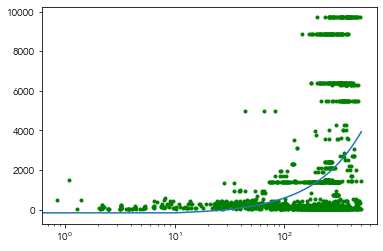

In [126]:
# plot linear regression on sed rate plot
# put all sed rate and magnetite points into arrays
sed_rates = []
magnetite = []
for key in comps:
    if "Sedimentation Rate [m/Ma]" in comps[key].columns:
        data = comps[key][["Magnetite [ppm]", "Sedimentation Rate [m/Ma]"]].dropna()
        # take only data where magnetite <500 ppm
        filtered = data[data["Magnetite [ppm]"]<500]
        sed_rates.extend(filtered["Sedimentation Rate [m/Ma]"])
        magnetite.extend(filtered["Magnetite [ppm]"])

fig, ax = plt.subplots()
ax.plot(magnetite,sed_rates, "g.")
ax.set_xscale("log")
#ax.set_ylim(10, 10**4)
#ax.set_xlim(0,500)


# perform linear regression
from sklearn.linear_model import LinearRegression
mag_array = np.array(magnetite).reshape((-1,1))
sed_array = np.array(sed_rates)
regressor = LinearRegression().fit(mag_array, sed_array)
# print outputs
print(regressor.coef_)
coeff = regressor.coef_[0]
print(regressor.intercept_)
intercept = regressor.intercept_
print(regressor.score(mag_array, sed_array))

# plot linear regression
x_points = np.linspace(0,500)
y_points = coeff*x_points+intercept
ax.plot(x_points,y_points)

[0.00617451]
5.349207373682228
0.006878269629314593


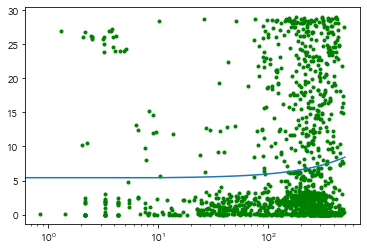

In [151]:
# plot linear regression on sulfate plot
# put all sulfate and magnetite points into arrays
sulfate = []
s_magnetite = []
for key in comps:
    if "Sulfate [mM]" in comps[key].columns:
        data = comps[key][["Magnetite [ppm]", "Sulfate [mM]"]].dropna()
        # take only data where magnetite <500 ppm
        filtered = data[data["Magnetite [ppm]"]<500]
        sulfate.extend(filtered["Sulfate [mM]"])
        s_magnetite.extend(filtered["Magnetite [ppm]"])

fig, ax = plt.subplots()
ax.plot(s_magnetite,sulfate, "g.")
ax.set_xscale("log")
#ax.set_ylim(10, 10**4)
#ax.set_xlim(0,500)


# perform linear regression
from sklearn.linear_model import LinearRegression
s_mag_array = np.array(s_magnetite).reshape((-1,1))
sulf_array = np.array(sulfate)
s_regressor = LinearRegression().fit(s_mag_array, sulf_array)
# print outputs
print(s_regressor.coef_)
s_coeff = s_regressor.coef_[0]
print(s_regressor.intercept_)
s_intercept = s_regressor.intercept_
print(s_regressor.score(s_mag_array, sulf_array))

# plot linear regression
x_points = np.linspace(0,500)
y_points = s_coeff*x_points+s_intercept
ax.plot(x_points,y_points)

In [ ]:
depth_ax.set(xscale="log", xlabel="Magnetite [ppm]", ylabel="Depth [mbsf]", title="Depth vs Magnetite")
#ylim=[-1,25], xlim=[30, 10**4.5]
depth_ax.invert_yaxis()
depth_ax.set_ylim(ymax=0)
# add number of points
points = "n = " + str(num_points(depth_ax))
depth_ax.text(10000, 100, points)
depth_fig.tight_layout()

depth_fig.savefig("outputs/compilation/22s/depth-circle.pdf")

In [11]:
# to edit standalone TOC figure
toc_ax.set(xscale="log", xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite")
#ylim=[-0.1,1.75]
toc_ax.set_ylim(0,5) # cuts off one high outlier
# add number of points
points = "n = " + str(num_points(toc_ax))
toc_ax.text(10000, 4, points)
toc_fig.tight_layout()
toc_fig.savefig("outputs/compilation/22s/toc-big.pdf")

In [159]:
# to edit standalone sulfate figure
sulf_ax.set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite", xscale="log")
#ylim=[-0.01, 5]
#sulf_cbar = sulf_fig.colorbar(sulf_im, label="TOC [wt. %]")
sulf_ax.set_ylim(ymin=0)
#sulf_ax.set_xlim(0,1000)
# add number of points
points = "n = " + str(num_points(sulf_ax))
sulf_ax.text(10000, 25, points)

# add linear regression
x_points = np.linspace(0,5000,400)
y_points = s_coeff*x_points+s_intercept
sulf_ax.plot(x_points,y_points)
sulf_ax.text(5000,20,"y=0.006175x+5.349\nR^2=0.006878")

sulf_fig.tight_layout()
sulf_fig.savefig("outputs/compilation/publication/sulfate-reg.pdf")

In [136]:
# to edit standalone sed rate figure

#cbar = sed_fig.colorbar(im, label="Depth [mbsf]")  # add colorbar to plot
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Ma]")
sed_ax.set_yscale("log")
#sed_ax.set_xscale("log")
sed_ax.set_ylim(10,10000)
sed_ax.set_xlim(0,500)
# add number of points
# points = "n = " + str(tot)
# sed_ax.text(5000, 6000, points)

# plot the linear regression
x_points = np.logspace(1,2.7, 300)
y_points = coeff*x_points+intercept
sed_ax.plot(x_points,y_points)
sed_ax.text(50, 15, "y=8.355x-241.6, R^2=0.1343")

# custom legend for sed rate subplot
# parameter s in scatter function is marker size in points^2 (so s=100 implies 10 points)
# marker size is determined by number of data points included in each plotted point
# for a point that includes 30 data points, it's size is sqrt(30*scale)
# where scale is a visibility scaling factor defined above
legend_elements = [plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="30",markersize=np.sqrt(30*scale)),plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="60",markersize=np.sqrt(60*scale)),plt.Line2D([0],[0],marker='.',color='w', markerfacecolor='g',label="90",markersize=np.sqrt(90*scale))]

sed_ax.legend(handles=legend_elements, loc="lower right", ncol=3, columnspacing=0.8, handletextpad=0)
for spine in ['top','bottom','left','right']:
    sed_ax.spines[spine].set_linewidth(0.5)
sed_ax.tick_params(width=0.5)
sed_fig.tight_layout()
sed_fig.savefig("outputs/compilation/publication/seds-inset-reg0.pdf")

In [8]:
iron_ax.set(xscale="log", xlabel="Magnetite [ppm]", yscale='log', ylabel="Fe 2+ [uM]", ylim=[0.1, 500], title="Fe 2+ vs Magnetite", xlim=[1, 10**4])
iron_fig.savefig("outputs/compilation/agu-poster/iron-updated.pdf")

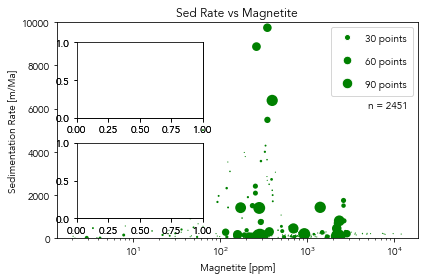

In [156]:
# do weird inset plotting
# was testing this out but didn't use for final versions of plots
inset_upper = inset_axes(sed_ax, width="35%", height="35%", loc="upper left", borderpad=2)
inset_lower = inset_axes(sed_ax, width="35%", height="35%", loc="lower left", borderpad=2)
#sed_fig.savefig("outputs/compilation/22s/seds-inset.pdf")
#sed_fig

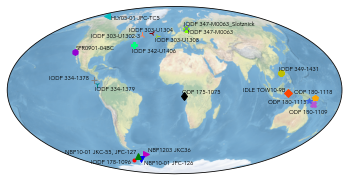

In [4]:
# mapping all of the locations
ax = plt.axes(projection=ccrs.Mollweide()) # for some reason you have to use this projection to make it work
ax.stock_img()

# set up dicts to look up lat and long of each site
# list goes in same order as sheets in the excel:
# Brachfeld 2009, Brachfeld 2001, Wang 2019, Gai 2020, Usui 2015 (1378), Usui 2015 (1379), Ishikawa 2002 (1109), Ishikawa 2002 (1115), Ishikawa 2002 (1118), Reilly 2020, Kawamura 2009 (1302-3), Kawamura 2009 (1304), Kawamura 2009 (1308), Reilly 2016 (outer bay), Reilly 2016 (mid bay), van Peer (2017), Richter (2001), Kreisler samples, Slotznick M0063
# to view order, print(comps.keys())
# list all sites -- this is same as size_sort at top
sites = ['IODP 178-1096', 'NBP10-01 JPC-126', 'NBP10-01 JKC-55, JPC-127', 'HLY05-01 JPC-TC5', 'NBP1203 JKC36', 'IODP 349-1431', 'ODP 180-1109', 'ODP 180-1118', 'ODP 180-1115', 'SPR0901-04BC', 'IODP 334-1378', 'IODP 347-M0063', 'IODP 334-1379', 'IODP 303-U1302-3', 'IODP 303-U1304', 'IODP 303-U1308', 'IODP 342-U1406', 'IDLE TOW10-9B', 'ODP 175-1075', 'IODP 347-M0063_Slotznick']

lats = [-67.5668, -65.890167, -65.756333, 72.694, -63.089, 15.375667, -9.506533, -9.585167, -9.1897, 34.281583, 8.592347, 58.6225, 8.681008, 50.186633, 53.056678, 49.877768, 40.35, -2.71723, -4.785, 58.6225]
longs = [-76.963227, -64.6965, -64.760667, -157.520, -55.395, 117.000167, 151.573167, 151.573683, 151.57395, -120.041483, -84.077358, 18.254333, -84.03379, -45.662583, -33.52969, -24.238125, -51.65, 121.51479, 10.075, 18.254333]


lat_dict = dict(zip(sites, lats))
long_dict = dict(zip(sites, longs))
symbol_dict = {}
label_dict = {}


# go through each site and plot it with label
for key in comps:
    symbol_dict[key] = plt.plot(long_dict[key], lat_dict[key], color=color_dict[key],
             marker=marker_dict[key], transform=ccrs.Geodetic())
    label_dict[key] = plt.text(long_dict[key]-2, lat_dict[key]+2, key, transform=ccrs.Geodetic(), size="xx-small")

# move labels and symbols around so nothing overlaps
# edits grouped by problem areas
# adjusting the location of a symbol is pretty gross
# if you're gonna read this, I apologize in advance

# 334 1378-9
symbol_dict["IODP 334-1378"][0].set_xdata([symbol_dict["IODP 334-1378"][0].get_xdata()-3])
label_dict['IODP 334-1378'].set_x(label_dict['IODP 334-1378'].get_position()[0]-50)
label_dict['IODP 334-1378'].set_va("center")
symbol_dict["IODP 334-1379"][0].set_ydata([symbol_dict["IODP 334-1379"][0].get_ydata()-3])
label_dict['IODP 334-1379'].set_y(label_dict['IODP 334-1379'].get_position()[1]-11)

# 180 1109/1115/1118
symbol_dict["ODP 180-1109"][0].set_ydata([symbol_dict["ODP 180-1109"][0].get_ydata()-3])
label_dict['ODP 180-1109'].set_ha("center")
label_dict['ODP 180-1109'].set_y(label_dict['ODP 180-1118'].get_position()[1]-13)

symbol_dict["ODP 180-1115"][0].set_xdata([symbol_dict["ODP 180-1115"][0].get_xdata()-6])
label_dict['ODP 180-1115'].set_ha("right")
label_dict['ODP 180-1115'].set_x(label_dict['ODP 180-1115'].get_position()[0]-7)
label_dict['ODP 180-1115'].set_va("top")

symbol_dict["ODP 180-1118"][0].set_ydata([symbol_dict["ODP 180-1118"][0].get_ydata()+3])
label_dict['ODP 180-1118'].set_y(label_dict['ODP 180-1118'].get_position()[1]+5)
label_dict['ODP 180-1118'].set_ha("center")

# 178-1096 and NBP cruises
symbol_dict["IODP 178-1096"][0].set_xdata([symbol_dict["IODP 178-1096"][0].get_xdata()-4])
label_dict['IODP 178-1096'].set_ha("right")
label_dict['IODP 178-1096'].set_x(label_dict['IODP 178-1096'].get_position()[0]-3)
label_dict['IODP 178-1096'].set_va("top")

symbol_dict["NBP10-01 JPC-126"][0].set_xdata([symbol_dict["NBP10-01 JPC-126"][0].get_xdata()+2])
label_dict['NBP10-01 JPC-126'].set_va("center")
label_dict['NBP10-01 JPC-126'].set_ha("left")
label_dict['NBP10-01 JPC-126'].set_y(label_dict['NBP10-01 JPC-126'].get_position()[1]-7)

symbol_dict["NBP10-01 JKC-55, JPC-127"][0].set_ydata([symbol_dict["NBP10-01 JKC-55, JPC-127"][0].get_ydata()+3])
label_dict['NBP10-01 JKC-55, JPC-127'].set_va("bottom")
label_dict['NBP10-01 JKC-55, JPC-127'].set_ha("right")
label_dict['NBP10-01 JKC-55, JPC-127'].set_y(label_dict['NBP10-01 JKC-55, JPC-127'].get_position()[1]+3)
label_dict['NBP10-01 JKC-55, JPC-127'].set_x(label_dict['NBP10-01 JKC-55, JPC-127'].get_position()[0]+2)

symbol_dict["NBP1203 JKC36"][0].set_xdata([symbol_dict["NBP1203 JKC36"][0].get_xdata()+7])
symbol_dict["NBP1203 JKC36"][0].set_ydata([symbol_dict["NBP1203 JKC36"][0].get_ydata()+3])
label_dict['NBP1203 JKC36'].set_y(label_dict['NBP1203 JKC36'].get_position()[1]+4)
label_dict['NBP1203 JKC36'].set_x(label_dict['NBP1203 JKC36'].get_position()[0]+15)

label_dict["IODP 342-U1406"].set_va('top')
label_dict["IODP 342-U1406"].set_y(label_dict["IODP 342-U1406"].get_position()[1]-4)

label_dict['IODP 303-U1302-3'].set_ha("right")
label_dict['IODP 303-U1302-3'].set_y(label_dict['IODP 303-U1302-3'].get_position()[1]-4)

label_dict['IODP 303-U1304'].set_ha("center")

symbol_dict['IODP 347-M0063'][0].set_ydata([symbol_dict['IODP 347-M0063'][0].get_ydata()-2])
label_dict['IODP 347-M0063'].set_y(label_dict['IODP 347-M0063'].get_position()[1]-8)
label_dict['IODP 347-M0063'].set_x(label_dict['IODP 347-M0063'].get_position()[0]+3)

# last few things
label_dict["IDLE TOW10-9B"].set_ha('right')
label_dict['IODP 303-U1308'].set_y(label_dict['IODP 303-U1308'].get_position()[1]-8)
label_dict['HLY05-01 JPC-TC5'].set_va("top")

# save if you want
plt.savefig("outputs/compilation/22s/site_map.pdf")
